# 1. 한글처리 및 활용 리뷰

In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
data = pd.read_csv('data_sent_new.csv',encoding='cp949')
data.head()
data["감정_대분류"].value_counts()

불안     7328
분노     6920
슬픔     6915
기쁨     6730
상처     6624
당황     6360
불안        1
기쁨        1
Name: 감정_대분류, dtype: int64

In [ ]:
data.loc[(data['감정_대분류'] == "기쁨"), '상황'] = "0"
data.loc[(data['감정_대분류'] == "불안"), '상황'] = "1"
data.loc[(data['감정_대분류'] == "당황"), '상황'] = "2"
data.loc[(data['감정_대분류'] == "슬픔"), '상황'] = "3"
data.loc[(data['감정_대분류'] == "분노"), '상황'] = "4"
data.loc[(data['감정_대분류'] == "상처"), '상황'] = "5"
data.loc[(data['감정_대분류'] == "불안 "), '상황'] = "1"
data.loc[(data['감정_대분류'] == "기쁨 "), '상황'] = "0"
data.loc[(data['감정_대분류'] == "기쁨 "), '상황'] = "0"

data.dropna(inplace=True)

In [ ]:
data.sentence[0]

'아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.  '

In [ ]:
from konlpy.tag import Okt  #Kkma
okt = Okt()
def tokenizer(text):  #함수를 만드는 부분
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = okt.nouns(text) #nouns를 morphs로 바꾸면 명사외에도...
    return tokens_ko

In [ ]:
data.sentence

0        아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...
1        당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...
2        고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...
3        재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. ...
4        빚을 드디어 다 갚게 되어서 이제야 안도감이 들어. 빚도 다 갚았으니 당분간은 아무...
                               ...                        
40874    같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...
40875    지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어. 결과가 좋게 나와서 다...
40876    엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼. 내 재능...
40877    이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야. 덕분에 건강...
40878    친구 관계가 너무 힘들어. 베푸는 만큼 돌아오지 않는 것 같아. 카페에 가서 대화하...
Name: sentence, Length: 40879, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(tokenizer=tokenizer,
                          stop_words=['건','악','최', '초','총','탈', '폭'],
                          min_df=0.1)
dtm = tf_vect.fit_transform( data.sentence )
dtm

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<40879x12 sparse matrix of type '<class 'numpy.float64'>'
	with 94820 stored elements in Compressed Sparse Row format>

In [ ]:
dtm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
target = data.상황
target

0        0
1        1
2        2
3        0
4        0
        ..
40874    1
40875    0
40876    3
40877    0
40878    1
Name: 상황, Length: 40879, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dtm, target, test_size=0.3, stratify=target)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
pred = rf.predict( X_test)

In [ ]:
from sklearn.metrics import classification_report
print( classification_report( y_test, pred))

              precision    recall  f1-score   support

           0       0.23      0.43      0.30      2019
           1       0.22      0.19      0.20      2199
           2       0.21      0.16      0.18      1908
           3       0.21      0.15      0.17      2075
           4       0.26      0.31      0.28      2076
           5       0.21      0.14      0.17      1987

    accuracy                           0.23     12264
   macro avg       0.22      0.23      0.22     12264
weighted avg       0.22      0.23      0.22     12264



In [ ]:
#위의 예제를 수정하세요
# Tfidf 말고 CountVectorizer를 사용해보세요
# Term의 개수를 늘려보세요.
# RF 외에 다른 분류 기법도 사용해서 비교해보세요.
# 파라미터 탐색 등을 활용하셔서 정분류율을 높여보세요.
# 50분까지 해보세요,

# 2. 자료 처리 연습 및 텍스트마이닝

###1) 필요한 패키지 불러오기

In [ ]:
import pandas as pd #자료를 읽기 위해 불러옴
import matplotlib.pyplot as plt #시각화하기 위해 불러옴
from konlpy.tag import Okt #형태소분석을 하기 위해 불러옴
from tqdm import tqdm #진행상황 확인
from sklearn.cluster import KMeans #Kmeans 군집기법을 사용하기 위해 불러옴

###2) 자료 읽기

In [ ]:
data = pd.read_csv("train_df.csv",encoding = 'cp949')
data.columns

Index(['IDX', '발화자', '발화문', '인텐트', '상담번호', '상담내순번'], dtype='object')

In [ ]:
data.인텐트.value_counts()
data.발화문

In [ ]:
from konlpy.tag import Okt
okt = Okt() #open korean text 형태소분석기
def token(text):  #CountVectorizer에 들어갈 tokenizer
    tokens_ko = okt.nouns(text) #명사만 추출
    return tokens_ko

stopwords = ['을',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=token, #형태소 분석 함수명
                             stop_words=stopwords,  #list이름
                             min_df=5 ) #0~1값인 경우 비율, 1이상의 값은 빈도로 해석
tfidf_vect.fit_transform(data['발화문'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['지적'] not in stop_words.
  warnings.warn(


<29360x1981 sparse matrix of type '<class 'numpy.float64'>'
	with 199455 stored elements in Compressed Sparse Row format>

In [ ]:
199455 / ( 29360*1981)  #sparsity

0.003429291484360278

In [ ]:
tfidf_vect.get_feature_names_out()  #term 리스트
tfidf_vect.get_stop_words()
tfidf_vect.vocabulary_  #term->id

In [ ]:
data.head()

IDX 발화자                                                발화문  \
0  28414   c                     혹시 플라워 스마트 톡 케이스 블루로 바꿀 수 있나요?   
1  28415   s                               현재 배송 중으로 교환이 어렵습니다.   
2  28416   c  USB1.0 속도 밖에 나오질 않네요리더 기만 교환 바랍니다. 불량 리더기도 택배로...   
3  28417   s                           네.리더기만 불량이 여교환 문의해주셨는데요.   
4  28418   c        빨리 챙겨서 보내주시기 바랍니다 아니면 다시 1개는 교환으로 보내야 하는지요?   

              인텐트    상담번호  상담내순번  
0  교환|반품|환불_일반_요청  389321      1  
1  교환|반품|환불_일반_요청  389321      2  
2  교환|반품|환불_일반_요청  179614      1  
3  교환|반품|환불_일반_요청  179614      2  
4  교환|반품|환불_일반_요청  325053      1

In [ ]:
data.dropna(inplace=True)
data.상담번호 = data.상담번호.astype("int")
data.상담내순번 = data.상담내순번.astype("int")

- 자료 처리
 - 1.주어진 데이터를 읽어서, 발화문에서 명사를 추출해서 DTM을 만들기
 - 2.같은 상담번호의 발화문을 하나의 텍스트로 합친 후, 명사만 뽑아서 DTM을 만들기
 -3.인텐트의 범주를 파악, 분류 및 군집을 적용

In [ ]:
def func1(x):
  x2 = x.values.tolist()
  tmp = " "
  for i in x2:
    tmp = tmp+i
  return tmp

In [ ]:
data.groupby("상담번호")["발화문"].apply(func1)

상담번호
111        아이패드 반품하려는데 반품신청은 어디서 하나요?공식홈페이지에서 반품신청 해주시면 ...
112                       아이패드 반품신청 어디서 해요?공식홈페이지에서 신청해주세요.
113          아이패드 반품신청 어디서 하는지 알 수 있을까요?공식 홈페이지에서 해주시면 됩니다.
114             아이패드 반품은 어디서 신청하죠?공식 홈페이지에서 반품신청 진행해주시면 돼요.
115                아이패드 반품 어디서 하는지 알려주세요.공식 홈페이지에서 해주시면 돼요.
                                ...                        
422167     그것도 모르고 제가 문제가 있는 줄 알았습니다 교환 요청해야 하나요?상품 불량으로...
422204     온도조절기 때문에 반품 신청했는데 혹시 온도조절기만 교환받을 수는 없는지요?반품건...
422216          15일에 가져갔어요 정확히 언제 환불 처리되나요?사이트에 반품 접수 바랍니다.
422291     아니고 온으로 해도 따뜻해지지가 않아서 교환 요청하니까 무조건 상품은 멀쩡하니 환...
422302     오늘 받아서 켜봤는데 두 개의 전원 중 한 개가 깜박거리면서 온도안 올라갑니 다급...
Name: 발화문, Length: 14639, dtype: object

In [ ]:
data1 = data.groupby("상담번호")["발화문"].apply(func1).reset_index().set_index("상담번호")

In [ ]:
data1.head()

발화문
상담번호                                                   
111    아이패드 반품하려는데 반품신청은 어디서 하나요?공식홈페이지에서 반품신청 해주시면 ...
112                   아이패드 반품신청 어디서 해요?공식홈페이지에서 신청해주세요.
113      아이패드 반품신청 어디서 하는지 알 수 있을까요?공식 홈페이지에서 해주시면 됩니다.
114         아이패드 반품은 어디서 신청하죠?공식 홈페이지에서 반품신청 진행해주시면 돼요.
115            아이패드 반품 어디서 하는지 알려주세요.공식 홈페이지에서 해주시면 돼요.

In [ ]:
data.상담번호.unique().shape

(14639,)

In [ ]:
data.head()

In [ ]:
data.인텐트.unique()

array(['교환|반품|환불_일반_요청', '교환|반품|환불_시간_확인', '교환|반품|환불_시간_비교',
       '교환|반품|환불_일반_질문', '교환|반품|환불_일반_확인', '교환|반품|환불_비용_확인',
       '교환|반품|환불_방법_확인', '교환|반품|환불_일반_비교', '교환|반품|환불_비용_질문',
       '교환|반품|환불_시간_요청', '교환|반품|환불_방법_요청', '교환|반품|환불_비용_비교',
       '교환|반품|환불_시간_질문', '교환|반품|환불_비용_요청', '교환|반품|환불_방법_질문',
       '교환|반품|환불_방법_비교'], dtype=object)

In [ ]:
data2 = data[["인텐트", "상담번호"]].drop_duplicates()

In [ ]:
data2.상담번호.unique().shape
#인텐트가 2개인 상담번호를 찾아서 제거해주세요.
#45분까지 해보세요.
id_tmp = data2.상담번호.value_counts()
id_tmp[id_tmp>1]
data2_tmp = pd.merge(data2, id_tmp, left_on="상담번호", right_index=True)
data2 = data2_tmp[ data2_tmp.상담번호_y == 1 ].iloc[:, 0:2]
data2

상담번호             인텐트
0      389321  교환|반품|환불_일반_요청
2      179614  교환|반품|환불_일반_요청
4      325053  교환|반품|환불_일반_요청
6      420229  교환|반품|환불_일반_요청
8      196860  교환|반품|환불_일반_요청
...       ...             ...
29350  190374  교환|반품|환불_방법_비교
29352  190322  교환|반품|환불_방법_비교
29354  289304  교환|반품|환불_방법_비교
29356  205795  교환|반품|환불_방법_비교
29358  190337  교환|반품|환불_방법_비교

[14630 rows x 2 columns]

In [ ]:
data3 = pd.merge( data1, data2, left_on="상담번호", right_on="상담번호")
data3

상담번호                                                발화문  \
0         111   아이패드 반품하려는데 반품신청은 어디서 하나요?공식홈페이지에서 반품신청 해주시면 ...   
1         112                  아이패드 반품신청 어디서 해요?공식홈페이지에서 신청해주세요.   
2         113     아이패드 반품신청 어디서 하는지 알 수 있을까요?공식 홈페이지에서 해주시면 됩니다.   
3         114        아이패드 반품은 어디서 신청하죠?공식 홈페이지에서 반품신청 진행해주시면 돼요.   
4         115           아이패드 반품 어디서 하는지 알려주세요.공식 홈페이지에서 해주시면 돼요.   
...       ...                                                ...   
14625  422167   그것도 모르고 제가 문제가 있는 줄 알았습니다 교환 요청해야 하나요?상품 불량으로...   
14626  422204   온도조절기 때문에 반품 신청했는데 혹시 온도조절기만 교환받을 수는 없는지요?반품건...   
14627  422216        15일에 가져갔어요 정확히 언제 환불 처리되나요?사이트에 반품 접수 바랍니다.   
14628  422291   아니고 온으로 해도 따뜻해지지가 않아서 교환 요청하니까 무조건 상품은 멀쩡하니 환...   
14629  422302   오늘 받아서 켜봤는데 두 개의 전원 중 한 개가 깜박거리면서 온도안 올라갑니 다급...   

                  인텐트  
0      교환|반품|환불_방법_질문  
1      교환|반품|환불_방법_질문  
2      교환|반품|환불_방법_질문  
3      교환|반품|환불_방법_질문  
4      교환|반품|환불_방법_질문  
...               ...  
14625  교환|반품|환불_일반_질문  
14626  교환|반품|환불_일반_질문  
14627  교환|반품|환불_시간_질문  
14628  교환|반품|환불_일반_질문  
14629  교환|반품|환불_일반_질문  

[14630 rows x 3 columns]

###3)발화문에 대한 DTM

In [ ]:
data3.head()

상담번호                                                발화문             인텐트
0   111   아이패드 반품하려는데 반품신청은 어디서 하나요?공식홈페이지에서 반품신청 해주시면 ...  교환|반품|환불_방법_질문
1   112                  아이패드 반품신청 어디서 해요?공식홈페이지에서 신청해주세요.  교환|반품|환불_방법_질문
2   113     아이패드 반품신청 어디서 하는지 알 수 있을까요?공식 홈페이지에서 해주시면 됩니다.  교환|반품|환불_방법_질문
3   114        아이패드 반품은 어디서 신청하죠?공식 홈페이지에서 반품신청 진행해주시면 돼요.  교환|반품|환불_방법_질문
4   115           아이패드 반품 어디서 하는지 알려주세요.공식 홈페이지에서 해주시면 돼요.  교환|반품|환불_방법_질문

In [ ]:
from konlpy.tag import Okt
okt = Okt()
def tokenizer(text):  #함수를 만드는 부분
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = okt.nouns(text) #nouns를 morphs로 바꾸면 명사외에도...
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(tokenizer=tokenizer,
                          stop_words=['건','악','최', '초','총','탈', '폭'])
dtm = tf_vect.fit_transform( data3.발화문 )
dtm

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<14630x5969 sparse matrix of type '<class 'numpy.float64'>'
	with 189539 stored elements in Compressed Sparse Row format>

In [ ]:
data3.인텐트.value_counts()

교환|반품|환불_일반_질문    4750
교환|반품|환불_시간_질문    3562
교환|반품|환불_방법_질문    3345
교환|반품|환불_비용_질문    1457
교환|반품|환불_방법_요청     852
교환|반품|환불_일반_요청     188
교환|반품|환불_시간_요청     178
교환|반품|환불_일반_확인     101
교환|반품|환불_방법_확인      73
교환|반품|환불_비용_요청      44
교환|반품|환불_시간_확인      38
교환|반품|환불_비용_확인      32
교환|반품|환불_방법_비교       5
교환|반품|환불_일반_비교       3
교환|반품|환불_비용_비교       1
교환|반품|환불_시간_비교       1
Name: 인텐트, dtype: int64

In [ ]:
cat = data3.인텐트.unique()
print(cat)
#요청:0, 질문:1, 그외:2
data3.intent = data3.인텐트.map({cat[0]:1, cat[1]:1, cat[2]:1,cat[3]:1,
                            cat[4]:0, cat[5]:0, cat[6]:0,cat[7]:2,
                            cat[8]:2, cat[9]:0, cat[10]:2,cat[11]:2,
                            cat[12]:2, cat[13]:2, cat[14]:2,cat[15]:2
                            })
data3.intent.value_counts()

['교환|반품|환불_방법_질문' '교환|반품|환불_방법_요청' '교환|반품|환불_비용_질문' '교환|반품|환불_시간_질문'
 '교환|반품|환불_시간_요청' '교환|반품|환불_일반_질문' '교환|반품|환불_비용_요청' '교환|반품|환불_일반_요청'
 '교환|반품|환불_시간_확인' '교환|반품|환불_방법_확인' '교환|반품|환불_일반_확인' '교환|반품|환불_비용_확인'
 '교환|반품|환불_비용_비교' '교환|반품|환불_일반_비교' '교환|반품|환불_방법_비교' '교환|반품|환불_시간_비교']


<ipython-input-217-f1ab3ebc7b8c>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data3.intent = data3.인텐트.map({cat[0]:1, cat[1]:1, cat[2]:1,cat[3]:1,


1    9216
0    5045
2     369
Name: 인텐트, dtype: int64

In [ ]:
target = pd.get_dummies(data3.intent)
target

0  1  2
0      0  1  0
1      0  1  0
2      0  1  0
3      0  1  0
4      0  1  0
...   .. .. ..
14625  1  0  0
14626  1  0  0
14627  0  1  0
14628  1  0  0
14629  1  0  0

[14630 rows x 3 columns]

In [ ]:
#질문, 요청, 그외 범주로 분류
#SMOTE를 활용(option)
#파티셔닝, 8:2
#테스트에 대한 accuracy 계산하세요
#10시까지 해보세요~

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split( dtm, target, test_size=0.2, stratify = target)

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
rf.score(X_test, y_test)

0.6879699248120301

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(dtm)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
lda.components_

array([[ 1.083,  0.724,  0.125, ...,  0.404,  0.125,  0.524],
       [ 0.125,  0.125,  0.125, ...,  0.125,  0.125,  0.125],
       [ 0.125,  0.445,  0.125, ...,  0.125,  0.125,  0.125],
       ...,
       [ 0.125,  1.588,  0.125, ...,  0.125,  0.125,  0.126],
       [ 0.432,  5.331,  0.125, ...,  0.125,  0.125,  0.125],
       [ 0.125, 11.28 ,  0.125, ...,  0.125,  0.125,  0.125]])

###4) 비어있는 리스트에 불용어 정의 후 토크나이즈 한 명사만 추출하기

In [ ]:
tokenized_data = []

# 불용어 정의
stopwords = ['을',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

for sentence in tqdm(data['발화문']): #발화문 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 발화문에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 8671/8671 [00:27<00:00, 314.04it/s]


In [ ]:
tokenized_data

###4) 토크나이즈 된 데이터로 Doc2Vec 적용


In [ ]:
from gensim.models.word2vec import Word2Vec #Word2Vec을 위해 불러옴
from gensim.models.doc2vec import Doc2Vec, TaggedDocument #Doc2Vec을 위해 불러옴

In [ ]:
tagged_data = [TaggedDocument(words=tokenized_data[i], tags=[i]) for i in range(len(tokenized_data)) ]

In [ ]:
model = Doc2Vec(
    epochs=40,
    window=5,
    vector_size=10,
    min_count=2,  #최소 단어 빈도를 2
    dm =1)  #pv-dm: 1, pv-dbow:2

model.build_vocab(tagged_data)

In [ ]:
model.dv.index_to_key

In [ ]:
model.dv.vectors

array([[-0.05230815, -0.05979127, -0.09880754, ..., -0.05166649,
        -0.09717963,  0.02010779],
       [ 0.02830311,  0.04643556, -0.04297275, ...,  0.09225623,
        -0.09501867, -0.03458086],
       [-0.03769909,  0.02607382, -0.05691557, ..., -0.09954669,
         0.04933045, -0.09122308],
       ...,
       [-0.06381153,  0.08892813,  0.02831066, ..., -0.00592651,
        -0.01249629,  0.03730538],
       [ 0.02861411, -0.03866036,  0.07315631, ...,  0.02023946,
        -0.0474561 ,  0.01914983],
       [-0.09955643,  0.03025864, -0.01307349, ..., -0.01807793,
         0.02721323, -0.02256219]], dtype=float32)

###5) Doc2Vec한 데이터로 Kmeans 군집분석하기

In [ ]:
docvec = model.docvecs.vectors

x=[3,4,5,6,7,8,9,10,11]
y=[]
for i in [3,4,5,6,7,8,9,10,11]:
  model1 = KMeans(n_clusters=i, random_state=0, algorithm='auto')
  model1.fit(docvec)
  y.append(model1.inertia_)

<ipython-input-62-d43f4d3b0fe0>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  docvec = model.docvecs.vectors
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.

In [ ]:
y

[253.0420684814453,
 242.23031616210938,
 233.9502716064453,
 226.96722412109375,
 220.1764678955078,
 214.48345947265625,
 209.8821563720703,
 205.19622802734375,
 201.24395751953125]

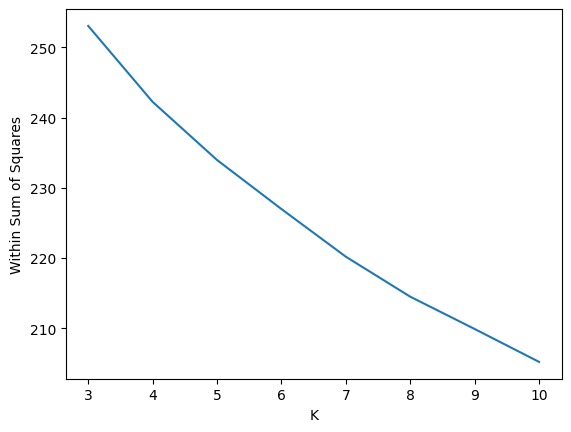

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x[0:8],y[0:8])
plt.xlabel("K")
plt.ylabel("Within Sum of Squares")
plt.show()

In [ ]:
model_final = KMeans(n_clusters=9, random_state=0, algorithm='auto')
model_final.fit(model.docvecs.vectors)


<ipython-input-65-eb15cce4c322>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model_final.fit(model.docvecs.vectors)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=9, random_state=0)

In [ ]:
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
print(model_final.cluster_centers_)

[[-0.036  0.03  -0.039  0.027 -0.042 -0.006 -0.049 -0.011  0.02   0.018]
 [-0.019 -0.036 -0.026  0.036  0.009  0.039  0.044  0.014  0.01  -0.037]
 [-0.024 -0.033 -0.026 -0.043 -0.002 -0.039  0.04  -0.025 -0.018  0.027]
 [ 0.046 -0.046  0.033  0.033 -0.018 -0.039 -0.027  0.002 -0.005 -0.014]
 [-0.039 -0.027  0.02  -0.025  0.033  0.026 -0.048  0.029 -0.003  0.025]
 [ 0.008  0.028  0.038  0.029 -0.016  0.035  0.03  -0.002 -0.042  0.047]
 [ 0.047  0.033 -0.005 -0.04  -0.01   0.004  0.027  0.044  0.038  0.007]
 [-0.04   0.041  0.048  0.007  0.006 -0.026  0.016 -0.012  0.019 -0.045]
 [ 0.046  0.024 -0.038 -0.014  0.034  0.011 -0.028 -0.041 -0.017 -0.022]]


In [ ]:
data['cluster'] = model_final.labels_

클러스터별 단어 출력하고 고빈도 단어 출력해서 해석하기

In [ ]:
total = []

for j in [0,1,2,3,4,5,6,7,8]:
  idx1 = data[ data['cluster']==j ].index
  temp = list(idx1.astype("int").values)
  idx1list=[]
  for j in temp:
    for q in tokenized_data[j]:
     if q not in idx1list:
       idx1list.append(q)
  total.append( idx1list)



In [ ]:
total[8]

In [ ]:
x

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
pred=model1.predict(model.docvecs.vectors)
pred
len(pred)

<ipython-input-71-59e69e81b0b8>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  pred=model1.predict(model.docvecs.vectors)


8671

###6) Doc2vec->intent 분류

In [ ]:
cat = data.인텐트.unique()
print(cat)
#일반:0, 시간, 비용, 방법:1
data.intent = data.인텐트.map({cat[0]:0, cat[1]:1, cat[2]:1,cat[3]:0})
data.intent.value_counts()

model = Doc2Vec(
    epochs=40,
    window=5,
    vector_size=100,
    min_count=2,  #최소 단어 빈도를 2
    dm =1)  #pv-dm: 1, pv-dbow:2

model.build_vocab(tagged_data)

['교환|반품|환불_일반_요청' '교환|반품|환불_시간_확인' '교환|반품|환불_시간_비교' '교환|반품|환불_일반_질문']


<ipython-input-73-dc146196be98>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.intent = data.인텐트.map({cat[0]:0, cat[1]:1, cat[2]:1,cat[3]:0})


In [ ]:
X = model.dv.vectors
y = data.intent

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify = y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model = KNeighborsClassifier().fit(X_train, y_train)
clf = RandomForestClassifier().fit(X_train, y_train)

clf.score( X_train, y_train)

0.9998558246828143

In [ ]:
pred = clf.predict( X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print( classification_report( y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1719
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1735
   macro avg       0.50      0.50      0.50      1735
weighted avg       0.98      0.99      0.99      1735



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#3. 영어 텍스트 마이닝

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset = 'all', random_state = 42)

In [ ]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print(news_data.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [ ]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행.
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train , y_train) #cnt_ect.fit_transform(X_train,y_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행.
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.606


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.674


In [ ]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용, 시간 소요
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.692


In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 2 Fold셋으로 설정.
params = { 'C':[0.1, 1]} #0.01, 0.1, 1, 5, 10
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=2 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 accuracy 평가.
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression accuracy {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Logistic Regression best C parameter : {'C': 1}
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.674


# 4. 영어텍스트마이닝2: IMDB의 영화 Review 긍정/부정 분류
Bag of Words Meets Bags of Popcorn(https://www.kaggle.com/c/word2vec-nlp-tutorial)

- labeledTrainData : 25,000 행의 리뷰의 id, sentiment,text가 포함된 레이블된 트레이닝 셋(sentiment는 긍정이면 1, 부정이면 0의 값을 가진다)
- testData : 25,000행의 리뷰의 id와 text 정보. 각 리뷰의 sentiment를 예측
- unlabledTrainData : 추가적인 트레이닝 셋으로 레이블이 없다. 50,000행의 id,text만 존재한다.



In [ ]:
!unzip labeledTrainData.tsv.zip
!unzip testData.tsv.zip

Archive:  labeledTrainData.tsv.zip
  inflating: labeledTrainData.tsv    
Archive:  testData.tsv.zip
  inflating: testData.tsv            


In [ ]:
import pandas as pd

train = pd.read_csv('labeledTrainData.tsv', header=0, sep="\t", quoting=3)
test = pd.read_csv('testData.tsv', header=0,sep = '\t',quoting = 3)

# header = 0 : 파일의 첫 번째 줄에 열 이름이 있음.
# delimiter = "\t" : \t는 필드가 tab으로 구분.
# quoting = 3 : 3은 텍스트의 쌍따옴표를 무시.

In [ ]:
train.info() # null value는 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [ ]:
train['sentiment'].value_counts()
# sentiment의 클래스가 딱 절반으로 되어있음을 알 수 있다. (부정, 긍정)

1    12500
0    12500
Name: sentiment, dtype: int64

In [ ]:
print(train['review'][:700]) ## review 컬럼을 700자 까지만 확인해본다.

0      "With all this stuff going down at the moment ...
1      "\"The Classic War of the Worlds\" by Timothy ...
2      "The film starts with a manager (Nicholas Bell...
3      "It must be assumed that those who praised thi...
4      "Superbly trashy and wondrously unpretentious ...
                             ...                        
695    "First let me say that I am not a Dukes fan, b...
696    "I like this presentation - I have read Bleak ...
697    "A somewhat typical bit of filmmaking from thi...
698    "This film breeches the fine line between sati...
699    "drss1942 really took the words right out of m...
Name: review, Length: 700, dtype: object


In [ ]:
#전체 데이터에서 20%만 분석에 사용

train, test = train_test_split(train, test_size=0.8, stratify=train.sentiment)


In [ ]:
train.shape

(5000, 3)

In [ ]:
train.sentiment.value_counts()

0    2500
1    2500
Name: sentiment, dtype: int64

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re

stemmer = SnowballStemmer('english')
stops = set(stopwords.words("english")) #CountVectorizer에서 적용 가능

def review_to_words(raw_review):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) #알파벳만
    words = letters_only.lower().split()  #소문자, 공백으로 나누시고,
    meaningful_words = [w for w in words if not w in stops] #스톱워즈 제거
    stemming_words = [stemmer.stem(w) for w in meaningful_words]  #stemming ...
    return(" ".join(stemming_words))  #원래 글처럼 합체

train["review"]=train.review.apply(review_to_words)

In [ ]:
#위의 train에 대해서 stop words를 제거하여 CountVectorizer에 넣고 dtm을 만드세요
#8:2로 파티셔닝하셔서 분류모형에 넣고, 테스트셋의 accuracy를 구해보세요.
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split( train.review, train.sentiment,
                                                    test_size=0.2, stratify=train.sentiment)


In [ ]:
# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환.
tfidf_vect = TfidfVectorizer(stop_words="english")
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.860


- 데이터 정제 Data Cleaning and Text Preprocessing
 1. BeatifulSoup을 통해 HTML태그를 제거
 2. 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
 3. NLTK 데이터를 사용해 불용어제거
 4. 어간추출(Stemming) 음소표기법(Lemmatizing)

- 정규화 normalization
 - 토큰화 tokenization
 - 품사

In [ ]:
!pip install beautifulsoup4
!pip install html5lib

In [ ]:
train.review.values[0]

'"Our imp of the perverse did good his first time out, thats for sure. The music is the best you may ever hear by any human, but you already know that, unless you have no taste or have a brain that is too small to understand greatness. A poor script that doesn\'t flesh out much of a story, but at least it has its moments. the breathtaking concert stuff is worth seeing it. He deserved an Oscar for this s**t, even though he was at times an ego driven twit, with his towering bodyguard Chick Huntsbery always in front. A movie that made non-fans fans, Take it or leave it. Prince does need to stay clear of acting in the future though. He takes himself way to serious. He is a genius musician, but pleaseee..Just enjoy the ride, my purple maestro..Peace."'

In [ ]:
from bs4 import BeautifulSoup
example = BeautifulSoup(train.review.values[0],'html5lib').get_text()
example

# BeautifulSoup을 불러와서 review를 확인
# 그냥 print 한것과 exam으로 불러온 텍스트를 비교
# <br \>과 같은 html 태그들 처리

'"Our imp of the perverse did good his first time out, thats for sure. The music is the best you may ever hear by any human, but you already know that, unless you have no taste or have a brain that is too small to understand greatness. A poor script that doesn\'t flesh out much of a story, but at least it has its moments. the breathtaking concert stuff is worth seeing it. He deserved an Oscar for this s**t, even though he was at times an ego driven twit, with his towering bodyguard Chick Huntsbery always in front. A movie that made non-fans fans, Take it or leave it. Prince does need to stay clear of acting in the future though. He takes himself way to serious. He is a genius musician, but pleaseee..Just enjoy the ride, my purple maestro..Peace."'

In [ ]:
#정규 표현식 사용
import re

#소문자와 대문자가 아닌 것은 공백으로 대체
# [^ 문자] : 문자를 제외하라는 정규표현식 ^은  not 의미
letters_only = re.sub('[^a-zA-Z]',' ',example)
letters_only

# re를 불러와서 정규표현식으로 특수문자를 제거.
# 소문자와 대문자가 아닌 것은 공백으로 대체 (re.sub("바꿔야할것", "바꾸고싶은것"))
# output을 보면 특수문자들이 전부 공백으로 대체

' Our imp of the perverse did good his first time out  thats for sure  The music is the best you may ever hear by any human  but you already know that  unless you have no taste or have a brain that is too small to understand greatness  A poor script that doesn t flesh out much of a story  but at least it has its moments  the breathtaking concert stuff is worth seeing it  He deserved an Oscar for this s  t  even though he was at times an ego driven twit  with his towering bodyguard Chick Huntsbery always in front  A movie that made non fans fans  Take it or leave it  Prince does need to stay clear of acting in the future though  He takes himself way to serious  He is a genius musician  but pleaseee  Just enjoy the ride  my purple maestro  Peace  '

- 토큰화

In [ ]:
lower_case = letters_only.lower()

words = lower_case.split()
print(words)

# letters_only를 전부 소문자로 대체해준다.
# split을 사용하여 단어단위로 나눈다. (토큰화)
# 437개의 토큰으로 이루어져 있다.

['our', 'imp', 'of', 'the', 'perverse', 'did', 'good', 'his', 'first', 'time', 'out', 'thats', 'for', 'sure', 'the', 'music', 'is', 'the', 'best', 'you', 'may', 'ever', 'hear', 'by', 'any', 'human', 'but', 'you', 'already', 'know', 'that', 'unless', 'you', 'have', 'no', 'taste', 'or', 'have', 'a', 'brain', 'that', 'is', 'too', 'small', 'to', 'understand', 'greatness', 'a', 'poor', 'script', 'that', 'doesn', 't', 'flesh', 'out', 'much', 'of', 'a', 'story', 'but', 'at', 'least', 'it', 'has', 'its', 'moments', 'the', 'breathtaking', 'concert', 'stuff', 'is', 'worth', 'seeing', 'it', 'he', 'deserved', 'an', 'oscar', 'for', 'this', 's', 't', 'even', 'though', 'he', 'was', 'at', 'times', 'an', 'ego', 'driven', 'twit', 'with', 'his', 'towering', 'bodyguard', 'chick', 'huntsbery', 'always', 'in', 'front', 'a', 'movie', 'that', 'made', 'non', 'fans', 'fans', 'take', 'it', 'or', 'leave', 'it', 'prince', 'does', 'need', 'to', 'stay', 'clear', 'of', 'acting', 'in', 'the', 'future', 'though', 'he',

- 불용어 제거

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

# words에 담겨져 있던 단어에 Stopwords가 있다면 제거한다.
# 제거한 토큰들을 확인한다.
# 토큰이 437개에서 219개로 줄어들었음을 알 수 있다.

72


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['imp',
 'perverse',
 'good',
 'first',
 'time',
 'thats',
 'sure',
 'music',
 'best',
 'may']

- Stemming

In [ ]:
# Porter stemmer

stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("Tje stemmed form of run is: {}".format(stemmer.stem("run")))

# maximum은 변형없이 출력.
# run의 변형어들은 run으로 stemming

maximum
The stemmed form of running is : run
The stemmed form of runs is: run
Tje stemmed form of run is: run


In [ ]:
# Lancaster stemmer
from nltk.stem.lancaster import LancasterStemmer
lanc_stemmer = LancasterStemmer()
print(lanc_stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(lanc_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lanc_stemmer.stem("runs")))
print("Tje stemmed form of run is: {}".format(lanc_stemmer.stem("run")))

# maximum의 어간이 maxim.

maxim
The stemmed form of running is : run
The stemmed form of runs is: run
Tje stemmed form of run is: run


In [ ]:
words[:10]

# 처리하기 전 단어들을 확인해본다.
# going, started 등 변형된 단어 check.

['imp',
 'perverse',
 'good',
 'first',
 'time',
 'thats',
 'sure',
 'music',
 'best',
 'may']

In [ ]:
#snowball stemmer 사용
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
words
# going, started등 stemming 확인

# Lemmatization (음소표기법)
- 언어학에서 음소표기법은 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석 될 수 있도록 굴절 된 형태의 단어를 그룹화

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wordnet_lem = WordNetLemmatizer()

print(wordnet_lem.lemmatize("fly"))
print(wordnet_lem.lemmatize("flies"))

words = [wordnet_lem.lemmatize(w) for w in words]
words[:10]
# lemmatizer를 사용하여 fly, flies를 처리하면 둘 다 fly로 변경.
# words를 lemmatization 처리한 후 결과를 확인
# stemming한 결과와 마찬가지로 출력

[nltk_data] Downloading package wordnet to /root/nltk_data...


fly
fly


['imp',
 'pervers',
 'good',
 'first',
 'time',
 'that',
 'sure',
 'music',
 'best',
 'may']

- 함수 작성

In [ ]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, "html.parser").get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english")) #CountVectorizer에서 적용 가능
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return(" ".join(stemming_words))

# 0. def로 함수 선언
# 1. HTML 제거
# 2. 영문자가 아닌 문자는 공백으로 변환
# 3. 소문자로 전체 변환
# 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다. stopwods를 세트로 변환
# 5. Stopwords 불용어 제거
# 6. Stemming으로 어간추출
# 7. 공백으로 구분된 문자열로 결합하여 결과 반환

In [ ]:
train.review[74]

'"I have been a huge Lynn Peterson fan ever since her breakthrough role in the 1988 blockbuster movie \\"Far North\\", and even though I loved her in her one other film \\"Slow\\" (2004) where she plays \\"Francis\\", this is by far and away her strongest role.<br /><br />Lynn, as I\'m sure you all know (or should), plays the critical role of \\"Driver\\".<br /><br />Unfortunately, other than Lynn\'s amazing performance, I\'m afraid this movie doesn\'t really have much going for it.<br /><br />Oh wait - there was one other thing - the amazing creativity of the editing to remove profanity for TV viewers. Memorable lines like: \\"You son-of-a-gun!\\", \\"You son-of-a-witch!\\", \\"Shoot!\\", and \\"Well, Forget You!\\"<br /><br />O.K. Bye.<br /><br />P.S.: Does anyone know where I can get another Lynn Peterson poster?"'

In [ ]:
clean_review = review_to_words(train.review[74])
clean_review

# review 데이터의 첫번째 데이터를 함수에 넣고 실행
# review 문장들이 토큰화 확인

'huge lynn peterson fan ever sinc breakthrough role blockbust movi far north even though love one film slow play franci far away strongest role lynn sure know play critic role driver unfortun lynn amaz perform afraid movi realli much go oh wait one thing amaz creativ edit remov profan tv viewer memor line like son gun son witch shoot well forget k bye p anyon know get anoth lynn peterson poster'

In [ ]:
processed = train.review.apply(review_to_words)

<ipython-input-138-b686452a15d6>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, "html.parser").get_text()


In [ ]:
dtm_en = CountVectorizer().fit_transform(processed)

# 5. 토픽모델링

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출.
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [ ]:
count_vect.get_feature_names_out()

- LDA 객체 생성 후 Count 피처 벡터화 객체로 LDA 수행

In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- 각 토픽 모델링 주제별 단어들의 연관도 확인
 - ida 객체의 componets_ 속성은 주제별로 개별 단어들의 연관도 정규화 숫자
 - shape는 주제 개수 X 피쳐 단어 개수
 - componets_ 에 들어 있는 숫자 값은 각 주제별로 단어가 나타난 횟수를 정규화 하여 나타냄.
 - 숫자가 클 수록 토픽에서 단어가 차지하는 비중이 높음

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[ 36.099, 135.627,  21.575, ...,  30.291,  86.683,  67.929],
       [  0.125,  14.44 ,   0.125, ..., 181.507,   0.125,  93.959],
       [334.763,   0.125, 146.743, ...,   0.125,  36.369,   0.125],
       ...,
       [ 36.02 ,  20.864,   4.296, ...,  14.506,   8.339,  15.569],
       [  0.125,   0.125,   0.125, ...,  91.728,   0.125,  37.458],
       [ 54.926,   4.47 ,   9.885, ...,  48.705,   0.125,   0.125]])

- 각 토픽별 중심 단어 확인

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]

        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names_out()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


- 개별 문서별 토픽 분포 확인
 - ida객체의 transform()을 수행하면 개별 문서별 토픽 분호를 변환

In [ ]:
doc_topics = lda.transform(feat_vect)
print(doc_topics.shape)
print(doc_topics[:3])

(7862, 8)
[[0.014 0.014 0.014 0.482 0.014 0.014 0.014 0.434]
 [0.278 0.182 0.002 0.53  0.002 0.002 0.002 0.002]
 [0.005 0.222 0.005 0.005 0.005 0.005 0.005 0.746]]


- 개별 문서별 토픽 분포도를 출력
 - 20Newsgroup으로 만들어진 문서명을 출력
 - featch_20newsgopurs()으로 만들어진 데이터의 filename속성은 모든 문서의 문서명
 - filenames 속성은 절대 디렉토리를 가지는 문서명을 가지고 있으므로 '\'로 분할하여 맨 마지막 두번째 부터 파일명확인

In [ ]:
def get_filename_list(newsdata):
  filename_list = []

  for file in newsdata.filenames:
    filenames_temp = file.split('\\')[-2:]
    filename = '.'.join(filenames_temp)
    filename_list.append(filename)
  return filename_list
filename_list = get_filename_list(news_df)
print('filename 개수',len(filename_list), 'filename list 10개만',filename_list[:10])

filename 개수 7862 filename list 10개만 ['/root/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20630', '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59422', '/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38765', '/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38810', '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59449', '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38461', '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.windows.x/66959', '/root/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104487', '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53875', '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53617']


- DataFrame으로 생성하여 문서별 토픽 분포도 확인

In [ ]:
import pandas as pd

topic_names = ['Topic \ '+ str(i) for i in range(0,8)]
doc_topic_df = pd.DataFrame(data = doc_topics, columns = topic_names,index = filename_list)
doc_topic_df.head(10)

Topic \ 0  Topic \ 1  \
/root/scikit_learn_data/20news_home/20news-byda...   0.013897   0.013944   
/root/scikit_learn_data/20news_home/20news-byda...   0.277504   0.181518   
/root/scikit_learn_data/20news_home/20news-byda...   0.005445   0.221666   
/root/scikit_learn_data/20news_home/20news-byda...   0.005439   0.005441   
/root/scikit_learn_data/20news_home/20news-byda...   0.006584   0.552000   
/root/scikit_learn_data/20news_home/20news-byda...   0.008342   0.008352   
/root/scikit_learn_data/20news_home/20news-byda...   0.372861   0.041667   
/root/scikit_learn_data/20news_home/20news-byda...   0.225351   0.674669   
/root/scikit_learn_data/20news_home/20news-byda...   0.008944   0.836686   
/root/scikit_learn_data/20news_home/20news-byda...   0.041733   0.041720   

                                                    Topic \ 2  Topic \ 3  \
/root/scikit_learn_data/20news_home/20news-byda...   0.013891   0.482218   
/root/scikit_learn_data/20news_home/20news-byda...   0.002121   0.530372   
/root/scikit_learn_data/20news_home/20news-byda...   0.005445   0.005445   
/root/scikit_learn_data/20news_home/20news-byda...   0.005449   0.578959   
/root/scikit_learn_data/20news_home/20news-byda...   0.006587   0.408485   
/root/scikit_learn_data/20news_home/20news-byda...   0.182622   0.767314   
/root/scikit_learn_data/20news_home/20news-byda...   0.377020   0.041668   
/root/scikit_learn_data/20news_home/20news-byda...   0.004814   0.075920   
/root/scikit_learn_data/20news_home/20news-byda...   0.008932   0.008941   
/root/scikit_learn_data/20news_home/20news-byda...   0.708081   0.041742   

                                                    Topic \ 4  Topic \ 5  \
/root/scikit_learn_data/20news_home/20news-byda...   0.013979   0.013892   
/root/scikit_learn_data/20news_home/20news-byda...   0.002121   0.002121   
/root/scikit_learn_data/20news_home/20news-byda...   0.005440   0.005442   
/root/scikit_learn_data/20news_home/20news-byda...   0.005440   0.388387   
/root/scikit_learn_data/20news_home/20news-byda...   0.006585   0.006585   
/root/scikit_learn_data/20news_home/20news-byda...   0.008335   0.008341   
/root/scikit_learn_data/20news_home/20news-byda...   0.041703   0.041703   
/root/scikit_learn_data/20news_home/20news-byda...   0.004812   0.004812   
/root/scikit_learn_data/20news_home/20news-byda...   0.008935   0.109691   
/root/scikit_learn_data/20news_home/20news-byda...   0.041671   0.041669   

                                                    Topic \ 6  Topic \ 7  
/root/scikit_learn_data/20news_home/20news-byda...   0.013935   0.434244  
/root/scikit_learn_data/20news_home/20news-byda...   0.002121   0.002121  
/root/scikit_learn_data/20news_home/20news-byda...   0.005442   0.745675  
/root/scikit_learn_data/20news_home/20news-byda...   0.005442   0.005442  
/root/scikit_learn_data/20news_home/20news-byda...   0.006588   0.006585  
/root/scikit_learn_data/20news_home/20news-byda...   0.008343   0.008351  
/root/scikit_learn_data/20news_home/20news-byda...   0.041667   0.041711  
/root/scikit_learn_data/20news_home/20news-byda...   0.004812   0.004810  
/root/scikit_learn_data/20news_home/20news-byda...   0.008932   0.008938  
/root/scikit_learn_data/20news_home/20news-byda...   0.041699   0.041686